In [167]:
import os.path as path
import numpy as np
import seaborn as sns
import pandas as pd
from yass.explore import RecordingExplorer
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (5, 10)

In [140]:
LOCAL_PATH = '/Users/Edu/data/yass'
REMOTE_PATH = '/ssd/data/eduardo/'

LOCAL = False

PATH = LOCAL_PATH if LOCAL else REMOTE_PATH

OLD = path.join(PATH, 'old-threshold')
NEW = path.join(PATH, 'new-threshold')

In [139]:
OLD = path.join(PATH, 'old-nnet')
NEW = path.join(PATH, 'new-nnet')

In [141]:
def n_groups(spike_train):
    return len(np.unique(spike_train[:, 1]))

def groups(spike_train):
    return np.unique(clear_new[:, 1], return_counts=True)

In [142]:
OLD, NEW

('/ssd/data/eduardo/old-threshold', '/ssd/data/eduardo/new-threshold')

In [143]:
clear_old = np.load(path.join(OLD, 'spike_index_clear.npy'))
clear_new = np.load(path.join(NEW, 'spike_index_clear.npy'))

In [144]:
clear_old.shape, clear_new.shape

((123219, 2), (112532, 2))

In [145]:
old = pd.DataFrame(clear_old, columns=['time_old', 'main_channel_old'])
new = pd.DataFrame(clear_new, columns=['time_new', 'main_channel_new'])

In [178]:
new.head()

,time_new,main_channel_new
0,2035,0
1,5411,0
2,6075,0
3,13224,0
4,17780,0


In [179]:
both = old.merge(new, how='left', left_on=['time_old', 'main_channel_old'], right_on=['time_new', 'main_channel_new'])

In [151]:
len(both)

123219

In [152]:
both[both.time_new.isna()].head()

,time_old,main_channel_old,time_new,main_channel_new
2,5944,0,NaN,NaN
17,39950,0,NaN,NaN
21,43444,0,NaN,NaN
53,103857,0,NaN,NaN
74,161634,0,NaN,NaN


In [153]:
# diff...
len(both[both.time_new.isna()])

12369

In [133]:
both2 = old.merge(new, how='right', left_on=['time_old', 'main_channel_old'], right_on=['time_new', 'main_channel_new'])

In [134]:
len(both2)

109861

In [125]:
both2[both2.time_new.isna()]

,time_old,main_channel_old,time_new,main_channel_new


In [126]:
len(both2[both2.time_new.isna()].head())

0

In [175]:
e = RecordingExplorer(path.join(PATH, 'new-nnet/standarized.bin'),
                      path.join(PATH, 'ej49_geometry1.txt'),
                      spike_size=15, neighbor_radius=70,
                      dtype='float32', n_channels=49,
                      data_format='long')

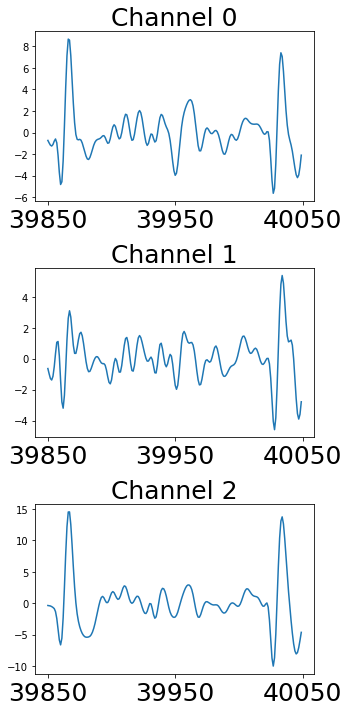

In [186]:
e.plot_series(39950-100, 39950+100, channels=[0, 1, 2])

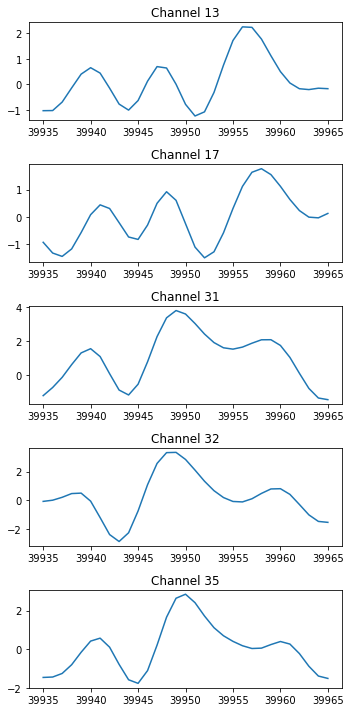

In [181]:
e.plot_waveform_around_main_channel(time=39950)

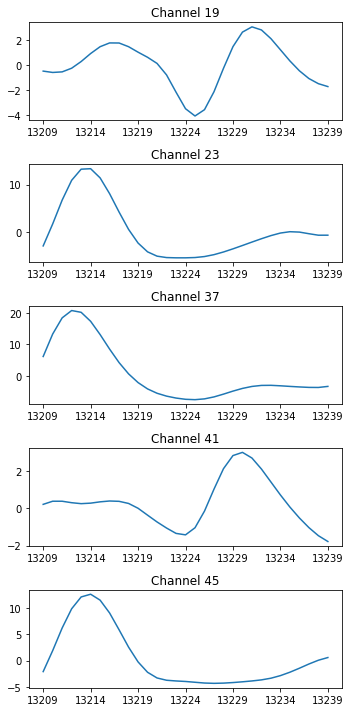

In [182]:
e.plot_waveform_around_main_channel(time=13224)

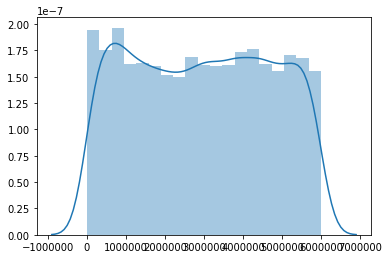

In [411]:
sns.distplot(old_main0)

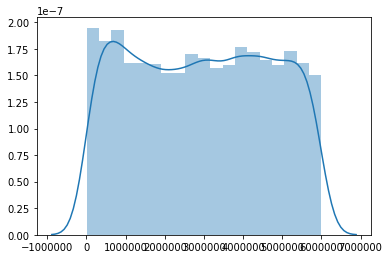

In [412]:
sns.distplot(new_main0)

In [415]:
col_old = np.load(path.join(OLD, 'spike_index_collision.npy'))
col_new = np.load(path.join(NEW, 'spike_index_collision.npy'))

In [416]:
col_old.shape, col_new.shape

((436477, 2), (443165, 2))

In [417]:
n_groups(col_old), n_groups(col_new)

(49, 49)

In [418]:
col_old[:10,]

array([[11,  3],
       [11, 20],
       [11, 25],
       [11, 31],
       [11, 45],
       [22, 18],
       [28, 46],
       [57, 43],
       [64, 46],
       [65, 39]], dtype=int32)

In [419]:
col_new[:10,]

array([[ 22,  18],
       [ 28,  46],
       [ 57,  43],
       [ 64,  46],
       [ 65,  39],
       [ 79,  39],
       [ 81,  32],
       [ 83,  38],
       [ 84,   4],
       [185,  40]])

In [420]:
old_train = np.load(path.join(OLD, 'spike_train.npy'))
new_train = np.load(path.join(NEW, 'spike_train.npy'))

In [421]:
old_train.shape, new_train.shape

((279151, 2), (664713, 2))

In [422]:
n_groups(old_train), n_groups(new_train)

(76, 86)